In [81]:
import sympy as s
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

* $f(x) = e^{x}$
* $g(x) = \sqrt{x-1}$

Find:
* $(f \circ g) (x) = f(g(x))$  
* $(g \circ f) (x) = g(f(x))$


Result:
- $(f \circ g) (x) = e^{\sqrt{x - 1}}$
- $(g \circ f) (x) =  \sqrt{e^{x} - 1}$


Domain:
- $(f \circ g): \{ n \in \mathbb{N} \mid n \geq 1 \}$


In [82]:
def f(x) -> float:
    return np.exp(x)


def g(x) -> float:
    return np.sqrt(x - 1)

In [83]:
def f_g(x) -> float:
    return f(g(x))


def g_f(x) -> float:
    return g(f(x))

In [84]:
X = np.linspace(-100, 100, 20)

In [85]:
df = pl.DataFrame(
    {
        "X": X,
        "f(x)": f(X),
        "g(x)": g(X),
        "(f o g)(x)": f_g(X),
        "(g o f)(x)": g_f(X),
    }
)

df

/var/folders/2d/0rmr26xn7lj7k8wy0rd4ps1w0000gn/T/ipykernel_64264/3789013239.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x-1)


X,f(x),g(x),(f o g)(x),(g o f)(x)
f64,f64,f64,f64,f64
-100.0,3.7201e-44,NaN,NaN,NaN
-89.473684,1.3870e-39,NaN,NaN,NaN
-78.947368,5.1712e-35,NaN,NaN,NaN
-68.421053,1.9280e-30,NaN,NaN,NaN
-57.894737,7.1885e-26,NaN,NaN,NaN
…,…,…,…,…
57.894737,1.3911e25,7.54286,1887.219745,3.7298e12
68.421053,5.1866e29,8.211032,3681.341022,7.2018e14
78.947368,1.9338e34,8.828781,6827.956323,1.3906e17


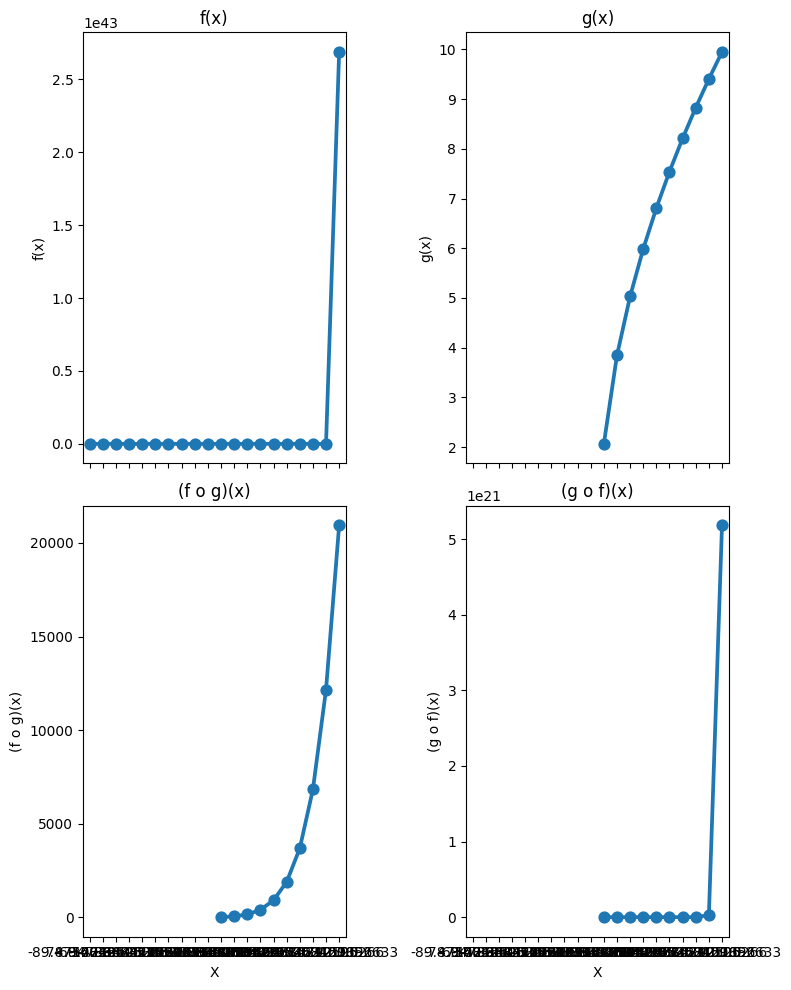

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8, 10))

x_col = df.columns[0]
y_cols = df.columns[1:]

for ax, y_col in zip(axes.flatten(), y_cols):
    sns.pointplot(data=df, x=x_col, y=y_col, ax=ax)
    ax.set_title(f"{y_col}")

plt.tight_layout()
plt.show()

In [87]:
x = s.symbols("x")
f = s.Function("f")(x)
g = s.Function("g")(x)
f = s.E**x
g = s.sqrt(x - 1)

In [88]:
(f_g := f.subs({x: g}))

exp(sqrt(x - 1))

In [89]:
(g_f := g.subs({x: f}))

sqrt(exp(x) - 1)

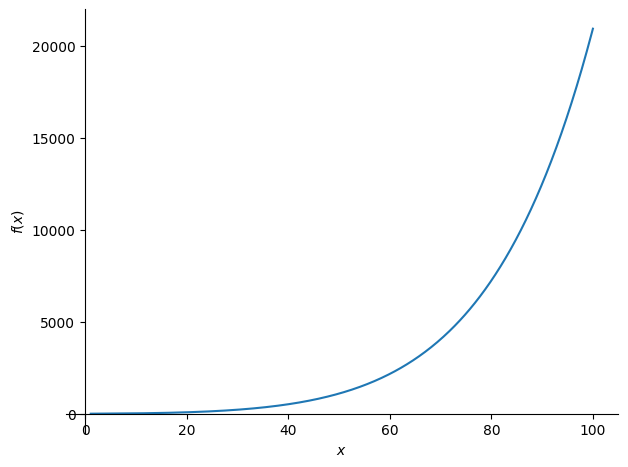

In [90]:
s.plot(f_g, (x, -100, 100))

In [110]:
f_g.subs({x: 1.1})
# Domain = [n for n in N if n > 0]

1.37194270196692